# Lab: Non-linear Modeling

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20.5f}'.format) #20 digits, 5 decimal places
plt.style.use('seaborn') # matplotlib plots

## 7.8.1 Polynomial Regression and Step Functions

In [3]:
wage = pd.read_csv('../datasets/Wage.csv', index_col=0)
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.31806,75.04315
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527,70.47602
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.87506,130.98218
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04139,154.68529
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.31806,75.04315
...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.04139,154.68529
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.60206,99.68946
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.19312,66.22941
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.47712,87.98103


In [4]:
#categorical 변수로 생성
wage.iloc[:, 2:10] = wage.iloc[:, 2:10].apply(pd.Categorical)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

#5차 polynomial, no interaction variable
pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False)
#age가 predictor 변수
polf = pol.fit_transform(wage.loc[:, 'age'].values.reshape(-1, 1))

wage['age_2'] = polf[:,1]
wage['age_3'] = polf[:,2]
wage['age_4'] = polf[:,3]
wage['age_5'] = polf[:,4]

#돈 많으면($250,000) true, 적으면 false인 dummy Y 생성
wage['wage_250'] = (wage.wage > 250).map({True: 1, False: 0})

#4차까지 예측
X = wage.loc[:, ['age', 'age_2', 'age_3', 'age_4']]
y = wage.wage

In [6]:
from sklearn.linear_model import LinearRegression

#Polynomial 회귀분석 
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-184.15417977415404,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

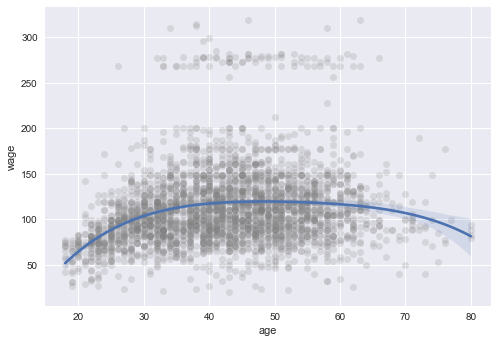

In [8]:
# seaborn은 polynomial plot하기 좋다

sns.regplot(x='age', y='wage', data=wage, order=4, 
            scatter_kws={'alpha': 0.2, 'color': 'gray', 'facecolor': None});
#4차 regression plot
#alpha = 투명도
#facecolor = background color

In [17]:
# ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

lin_reg_sm = ols(formula='wage ~ age + age_2 + age_3 + age_4 + age_5', data=wage).fit()
anova_sm = sm.stats.anova_lm(lin_reg_sm, typ=1) #type 2는 mse가 없음

anova_sm #3,4차가짱

,df,sum_sq,mean_sq,F,PR(>F)
age,1.00000,"199,869.66497","199,869.66497",125.44432,0.00000
age_2,1.00000,"228,786.01013","228,786.01013",143.59311,0.00000
age_3,1.00000,"15,755.69366","15,755.69366",9.88876,0.00168
age_4,1.00000,"6,070.15212","6,070.15212",3.80981,0.05105
age_5,1.00000,"1,282.56302","1,282.56302",0.80498,0.36968
Residual,"2,994.00000","4,770,321.68581","1,593.29382",nan,nan


### logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(fit_intercept=True, C=1e9)
log_reg.fit(X, wage.wage_250)

log_reg.intercept_, log_reg.coef_

#C : float, default=1.0 Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
#Comparison of the sparsity (percentage of zero coefficients) of solutions when L1, L2 and Elastic-Net penalty are used for different values of C. We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions. As expected, the Elastic-Net penalty sparsity is between that of L1 and L2.

(array([-5.6498841e-05]),
 array([[-1.12834480e-03, -1.60767970e-02,  5.10936262e-04,
         -4.28423077e-06]]))

In [20]:
from statsmodels.formula.api import glm

lr_sm = glm(formula='wage_250 ~ age + age_2 + age_3 + age_4',
            data = wage,
            family = sm.families.Binomial(sm.families.links.logit)).fit()
#Y는 binomial

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """


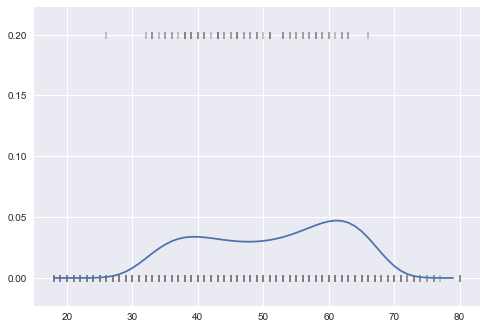

In [24]:
#age의 range를 row vector로 펼침
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1,1)

#age의 범위 내에서 data사용
X_test = pd.DataFrame(PolynomialFeatures(4, include_bias=True).fit_transform(age_grid),
                      columns=['Intercept', 'age', 'age_2', 'age_3', 'age_4'])

log_reg_pred = lr_sm.predict(X_test)

#/5 -> 그냥 보기 좋기 위해 줄인건가?
plt.scatter(wage.age, wage.wage_250/5, marker='|', color='gray', alpha=0.5)

#logistic 함수 그리기
plt.plot(age_grid, log_reg_pred);

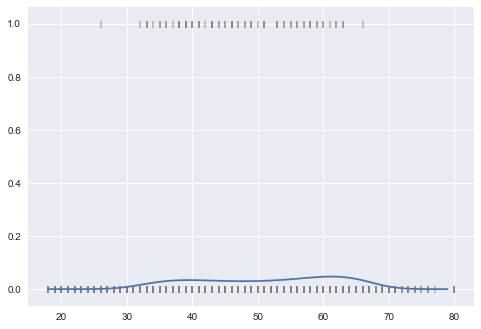

In [33]:
plt.scatter(wage.age, wage.wage_250, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_reg_pred);
#맞는것 같다...

### Fitting step functions

In [27]:
age_step, bins = pd.cut(wage.age, 4, retbins=True, right=True)
#age를 4구간으로 cut
#right : bool, default True Indicates whether `bins` includes the rightmost edge or not. If``right == True`` (the default), then the `bins` ``[1, 2, 3, 4]``indicate (1,2], (2,3], (3,4]. This argument is ignored when `bins` is an IntervalIndex.
#return bins
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [47]:
wage_step = pd.concat([wage.age, age_step, wage.wage, wage.wage_250], 
                      keys=['age', 'age_step', 'wage', 'wage_250'], 
                      axis=1)
#column방향으로 변수 쌓기, key이름 지정
wage_step

,age,age_step,wage,wage_250
231655,18,"(17.938, 33.5]",75.04315,0
86582,24,"(17.938, 33.5]",70.47602,0
161300,45,"(33.5, 49.0]",130.98218,0
155159,43,"(33.5, 49.0]",154.68529,0
11443,50,"(49.0, 64.5]",75.04315,0
...,...,...,...,...
376816,44,"(33.5, 49.0]",154.68529,0
302281,30,"(17.938, 33.5]",99.68946,0
10033,27,"(17.938, 33.5]",66.22941,0
14375,27,"(17.938, 33.5]",87.98103,0


In [49]:
X = pd.get_dummies(wage_step.age_step) #더미로 만들기
X

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
231655,1,0,0,0
86582,1,0,0,0
161300,0,1,0,0
155159,0,1,0,0
11443,0,0,1,0
...,...,...,...,...
376816,0,1,0,0
302281,1,0,0,0
10033,1,0,0,0
14375,1,0,0,0


In [50]:
X = X.drop(X.columns[0], axis=1)
X #첫번째 dummy는 상수항으로 사용

,"(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
231655,0,0,0
86582,0,0,0
161300,1,0,0
155159,1,0,0
11443,0,1,0
...,...,...,...
376816,1,0,0
302281,0,0,0
10033,0,0,0
14375,0,0,0


In [51]:
y = wage_step.wage

lr_step = LinearRegression(fit_intercept=True)

lr_step.fit(X, y)
lr_step.intercept_, lr_step.coef_

(94.158392033519, array([24.05349138, 23.664559  ,  7.6405917 ]))

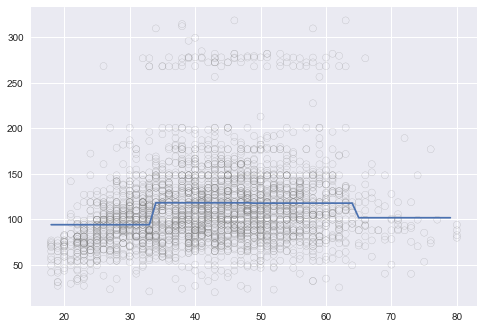

In [39]:
age_grid_bins = np.digitize(age_grid.ravel(), bins)

X_test = pd.get_dummies(age_grid_bins).drop(1, axis=1)

lin_pred = lr_step.predict(X_test)

plt.scatter(wage_step.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, lin_pred);

In [53]:
?np.digitize

In [64]:
age_grid[0:6]

array([[18],
       [19],
       [20],
       [21],
       [22],
       [23]])

In [57]:
age_grid.ravel() #row vector로

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [60]:
age_grid_bins

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [61]:
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [58]:
X_test=pd.get_dummies(age_grid_bins)
X_test

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
57,0,0,0,1
58,0,0,0,1
59,0,0,0,1
60,0,0,0,1


In [59]:
X_test=pd.get_dummies(age_grid_bins).drop(1,axis=1)
X_test

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
57,0,0,1
58,0,0,1
59,0,0,1
60,0,0,1


C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


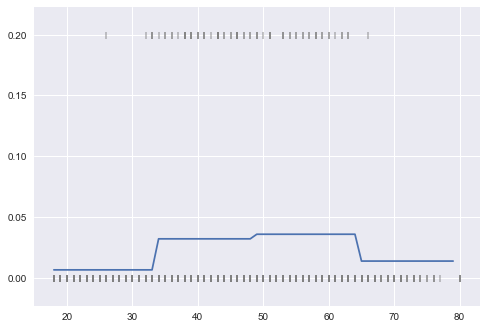

In [41]:
lr_sm = sm.GLM(wage_step.wage_250, sm.add_constant(X),
            family=sm.families.Binomial(sm.families.links.logit)).fit()

log_pred = lr_sm.predict(sm.add_constant(X_test)) #더미에서 하나 뺐으니깐

plt.scatter(wage_step.age, wage_step.wage_250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_pred);

## 7.8.2 Splines

In [65]:
from patsy import dmatrix

### Cubic spline

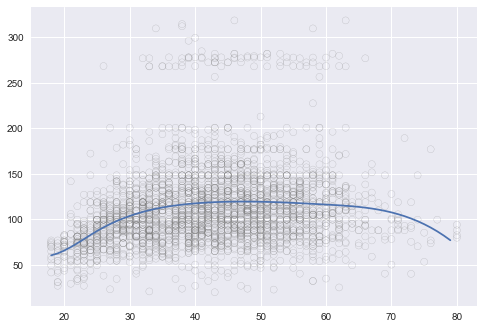

In [66]:
age_spline1 = dmatrix('bs(age, knots=(25,40,60), degree=3, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')
#knot는 스스로 지정 (3개)

age_grid_spline1 = dmatrix('bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg1 = LinearRegression(fit_intercept=False)
spline_reg1.fit(age_spline1, wage.wage)

spline_pred1 = spline_reg1.predict(age_grid_spline1)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred1);

In [71]:
age_grid[0:5]

array([[18],
       [19],
       [20],
       [21],
       [22]])

In [67]:
age_spline1

,Intercept,"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
231655,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
86582,1.00000,0.55991,0.40378,0.03340,0.00000,0.00000,0.00000
161300,1.00000,0.00000,0.11480,0.61856,0.26273,0.00391,0.00000
155159,1.00000,0.00000,0.16711,0.63317,0.19888,0.00084,0.00000
11443,1.00000,0.00000,0.03401,0.50819,0.42654,0.03125,0.00000
...,...,...,...,...,...,...,...
376816,1.00000,0.00000,0.13932,0.62847,0.23021,0.00200,0.00000
302281,1.00000,0.13774,0.62911,0.22882,0.00433,0.00000,0.00000
10033,1.00000,0.30262,0.58685,0.11025,0.00028,0.00000,0.00000
14375,1.00000,0.30262,0.58685,0.11025,0.00028,0.00000,0.00000


In [72]:
age_grid_spline1

,Intercept,"bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,1.00000,0.35200,0.01810,0.00015,0.00000,0.00000,0.00000
2,1.00000,0.56743,0.06690,0.00124,0.00000,0.00000,0.00000
3,1.00000,0.67110,0.13813,0.00417,0.00000,0.00000,0.00000
4,1.00000,0.68785,0.22353,0.00989,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...
57,1.00000,0.00000,0.00000,0.00160,0.05642,0.44993,0.49205
58,1.00000,0.00000,0.00000,0.00067,0.03291,0.36924,0.59717
59,1.00000,0.00000,0.00000,0.00020,0.01515,0.26837,0.71629
60,1.00000,0.00000,0.00000,0.00002,0.00392,0.14579,0.85027


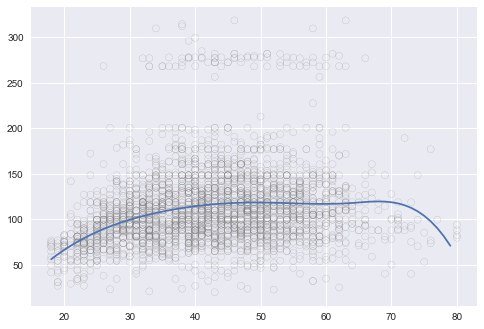

In [43]:
age_spline2 = dmatrix('bs(age, df=6, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')

## degree를 스스로 지정

age_grid_spline2 = dmatrix('bs(age_grid, df=6, include_intercept=False)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg2 = LinearRegression(fit_intercept=False)
spline_reg2.fit(age_spline2, wage.wage)

spline_pred2 = spline_reg2.predict(age_grid_spline2)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred2);

### Natural spine

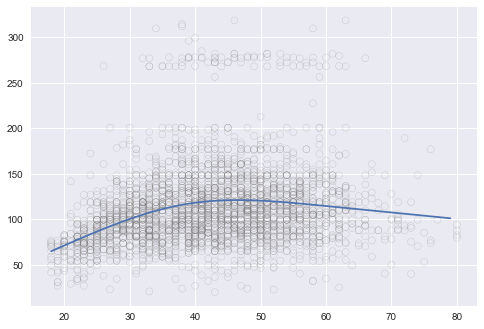

In [73]:
#bs->cr
age_spline3 = dmatrix('cr(age, df=4)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline3 = dmatrix('cr(age_grid, df=4)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg3 = LinearRegression(fit_intercept=False)
spline_reg3.fit(age_spline3, wage.wage)

spline_pred3 = spline_reg3.predict(age_grid_spline3)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred3);

## 7.8.3 GAMs

In [45]:
#natural splines on year and age, edu as dummies
year_spl = dmatrix('cr(year, df=4)',
                   data=wage,
                   return_type='dataframe').drop('Intercept', axis=1)

age_spl = dmatrix('cr(age, df=5)',
                  data=wage,
                  return_type='dataframe').drop('Intercept', axis=1)

edu_gam = pd.get_dummies(wage.education).iloc[:, 1:]

#column방향으로 변수 쌓기
wage_gam = pd.concat([wage.wage, year_spl, age_spl, edu_gam], axis=1)

X = wage_gam.iloc[:, 1:14]
y = wage_gam.wage

gam = LinearRegression(fit_intercept=True)
gam.fit(X, y)

gam.intercept_, gam.coef_

(75.40855392027856,
 array([-4.43395136e+00, -3.03043899e-02,  1.58046315e+00,  2.88379259e+00,
        -2.95110484e+01,  8.20753750e+00,  1.70035897e+01,  1.19661833e+01,
        -7.66626210e+00,  1.07857906e+01,  2.31820289e+01,  3.78598409e+01,
         6.23017265e+01]))